### Проведите анализ двух датасетов на выбор с использованием линейной или логистической регрессии.

* Датасеты на выбор:
    * Boston Housing (Линейная регрессия)
    * Titanic (Логистическая регрессия)

* Требования:

    1. Метрики оценки моделей:
        * Для линейной регрессии: MSE, R².
        * Для логистической регрессии: Accuracy, Precision, Recall, F1-Score, ROC-AUC.
    2. Линейная регрессия (если выбран Boston Housing):
        * Проведите предобработку данных.
        * Обучите модель линейной регрессии и оцените её качество.
        * Визуализируйте результаты.
    3. Логистическая регрессия (если выбран Titanic):
        * Проведите предобработку данных.
        * Обучите модель логистической регрессии и оцените её качество.
        * Визуализируйте результаты и постройте ROC-кривую.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


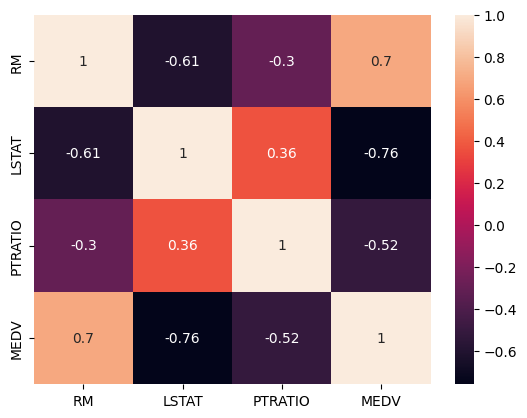

In [3]:
df_boston = pd.read_csv('boston_housing.csv')

print(df_boston .isnull().sum())

sns.heatmap(df_boston .corr(), annot=True)
plt.show()


Среднеквадратичная ошибка: 6789025559.26589
R²: 0.6910934003098511


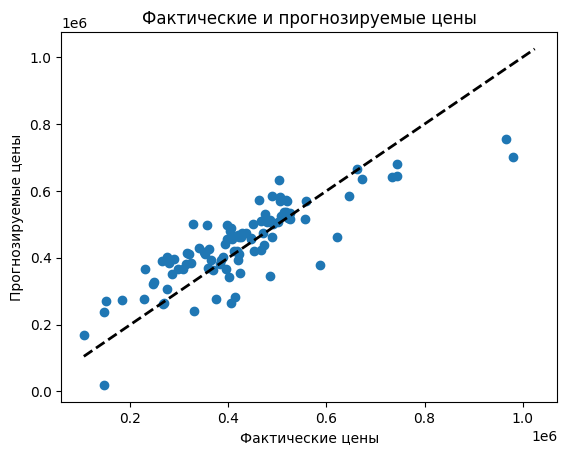

In [4]:
X = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Среднеквадратичная ошибка:", mse)
print("R²:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Фактические цены")
plt.ylabel("Прогнозируемые цены")
plt.title("Фактические и прогнозируемые цены")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [5]:
df_titanic = sns.load_dataset('titanic')
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())
df_titanic = df_titanic.drop(['deck', 'embark_town', 'who', 'alive'], axis=1)
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])
df_titanic = pd.get_dummies(df_titanic, columns=['sex', 'embarked', 'class'], drop_first=True)

In [6]:
X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Точность:", accuracy)
print("Точность (Precision):", precision)
print("Полнота (Recall):", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)


Точность: 0.8156424581005587
Точность (Precision): 0.7971014492753623
Полнота (Recall): 0.7432432432432432
F1-Score: 0.7692307692307693
ROC-AUC: 0.8801801801801802


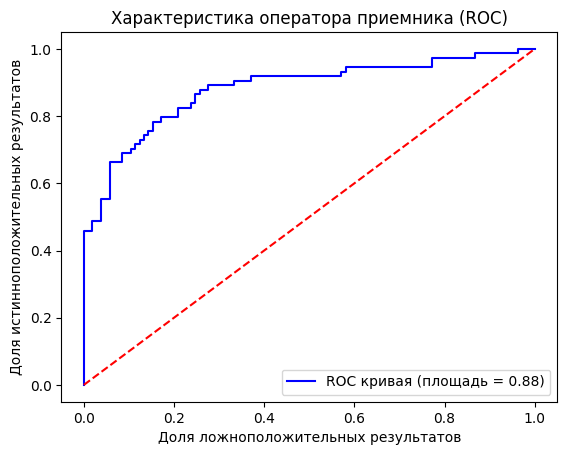

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color="blue", label="ROC кривая (площадь = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("Доля ложноположительных результатов")
plt.ylabel("Доля истинноположительных результатов")
plt.title("Характеристика оператора приемника (ROC)")
plt.legend(loc="lower right")
plt.show()